#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/competitions/desafio-de-prediccion-de-precios-de-portatiles

## Librerias

In [72]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd 
import re
import numpy as np

# Carga de datos
# ==============================================================================
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sample_submission_df = pd.read_csv('data/sample_submission.csv')

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


## Data

In [98]:
train_df

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,389.00
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1195.00
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8GB,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.00
910,891,965,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,1775.00


In [99]:
test_df

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,181,1098,HP,Spectre x360,Ultrabook,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.3kg
1,708,330,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg
2,862,1260,Acer,Aspire ES1-572,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,500GB HDD,Intel HD Graphics 520,Linux,2.4kg
3,1064,1137,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg
4,702,1015,HP,ENVY -,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.34kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1281,145,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.4kg
387,524,1195,Lenovo,IdeaPad Y700-15ISK,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31kg
388,1015,1070,HP,250 G5,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.96kg
389,1236,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg


## Data exploration

In [100]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,912.0,NaN,NaN,NaN,645.091009,380.313813,0.0,319.75,636.5,980.25,1302.0
laptop_ID,912.0,NaN,NaN,NaN,666.192982,384.873846,1.0,330.5,673.5,998.5,1320.0
Company,912,19,Lenovo,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,912,475,Inspiron 3567,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeName,912,6,Notebook,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inches,912.0,NaN,NaN,NaN,15.011404,1.411744,10.1,14.0,15.6,15.6,18.4
ScreenResolution,912,35,Full HD 1920x1080,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cpu,912,104,Intel Core i5 7200U 2.5GHz,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ram,912,8,8GB,434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Memory,912,36,256GB SSD,293,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


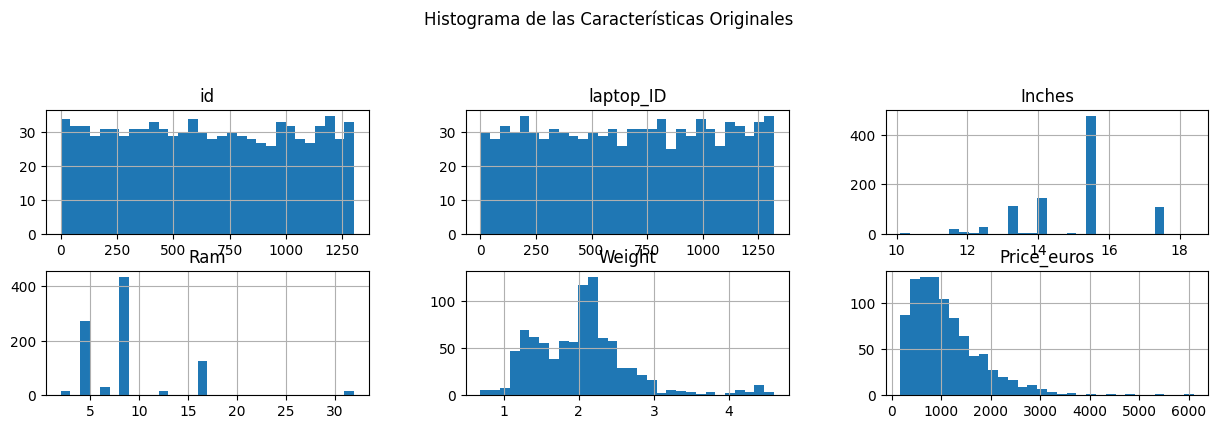

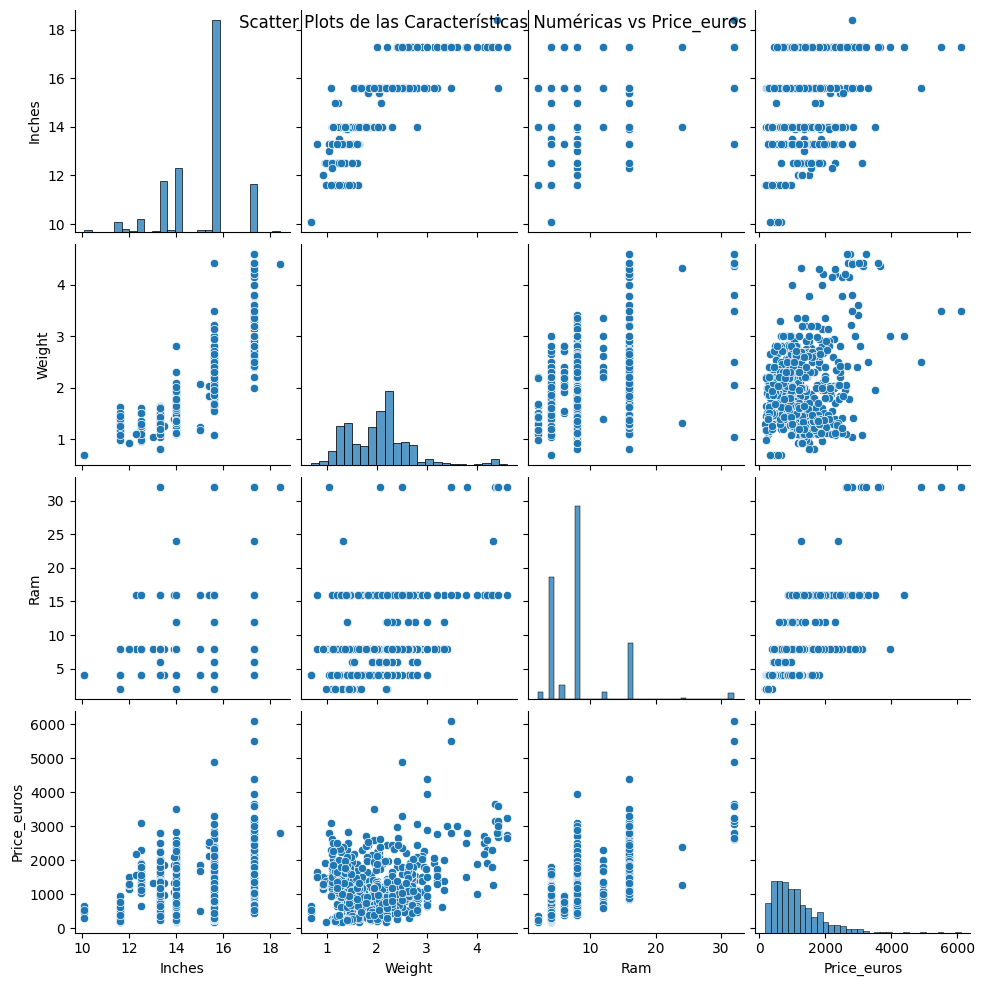

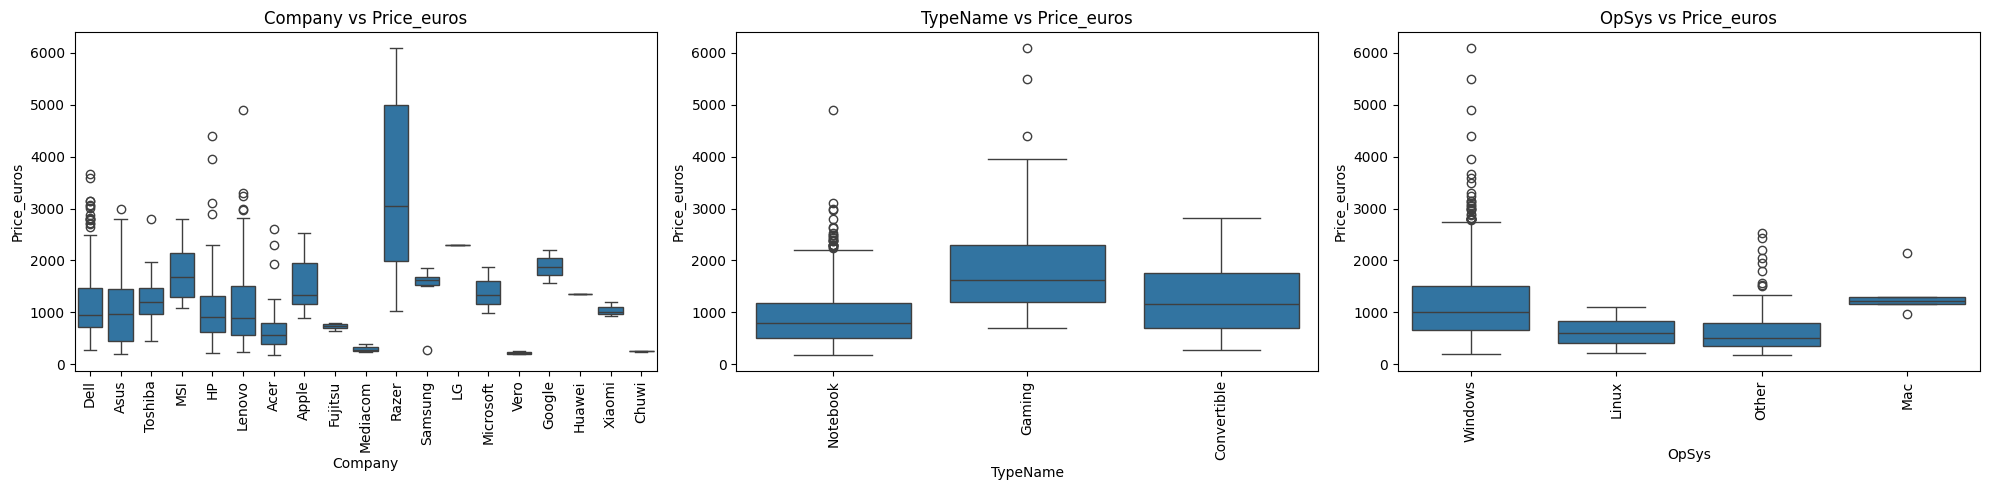

In [48]:
# Histograma de todas las características numéricas
train_df.hist(bins=30, figsize=(15, 10), layout=(5, 3))
plt.suptitle('Histograma de las Características Originales')
plt.show()

# Graficar scatter plots de características numéricas vs Price_euros
num_features = ['Inches', 'Weight', 'Ram', 'Price_euros']
sns.pairplot(train_df[num_features])
plt.suptitle('Scatter Plots de las Características Numéricas vs Price_euros')
plt.show()

# Boxplot de características categóricas vs Price_euros
cat_features = ['Company', 'TypeName', 'OpSys']
fig, axes = plt.subplots(1, len(cat_features), figsize=(20, 5))
for i, feature in enumerate(cat_features):
    sns.boxplot(x=feature, y='Price_euros', data=train_df, ax=axes[i])
    axes[i].set_title(f'{feature} vs Price_euros')
    axes[i].set_xticks(range(len(train_df[feature].unique())))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

## Data processing

In [73]:
# Eliminar las unidades 'kg' y convertir la columna a valores numéricos
train_df['Weight'] = train_df['Weight'].str.replace('kg', '').astype(float)
test_df['Weight'] = test_df['Weight'].str.replace('kg', '').astype(float)

In [74]:
# Limpiar la columna Ram
train_df['Ram'] = train_df['Ram'].str.replace('GB', '').astype(int)
test_df['Ram'] = test_df['Ram'].str.replace('GB', '').astype(int)

In [47]:
# Limpiar y convertir la columna Memory
def clean_memory(memory):
    if 'TB' in memory:
        return float(memory.replace('TB', '')) * 1024  # Convertir TB a GB
    else:
        return float(memory.replace('GB', ''))

In [48]:
# Separar Memory en diferentes columnas
def split_memory(memory):
    memory_parts = memory.split('+')
    cleaned_memory = [clean_memory(m.strip().split()[0]) for m in memory_parts]  # Solo limpiar la parte numérica
    if len(cleaned_memory) == 1:
        return cleaned_memory[0], 0  # Solo una unidad de almacenamiento
    return cleaned_memory

In [49]:
# Aplicar la función de limpieza y separación a la columna Memory
memory_split = train_df['Memory'].apply(split_memory).apply(pd.Series)
train_df['Memory1'] = memory_split[0]
train_df['Memory2'] = memory_split[1]
memory_split_t = test_df['Memory'].apply(split_memory).apply(pd.Series)
test_df['Memory1'] = memory_split_t[0]
test_df['Memory2'] = memory_split_t[1]

In [50]:
# Función para extraer la resolución de la pantalla
def parse_resolution(resolution):
    if 'x' in resolution:
        parts = resolution.split()
        for part in parts:
            if 'x' in part:
                width, height = part.split('x')
                return int(width), int(height)
    return np.nan, np.nan

In [51]:
# Aplicar la función 
train_df[['Width', 'Height']] = train_df['ScreenResolution'].apply(parse_resolution).apply(pd.Series)
train_df['Touchscreen'] = train_df['ScreenResolution'].str.contains('Touchscreen').astype(int)
test_df[['Width', 'Height']] = test_df['ScreenResolution'].apply(parse_resolution).apply(pd.Series)
test_df['Touchscreen'] = test_df['ScreenResolution'].str.contains('Touchscreen').astype(int)

In [53]:
# Limpiar la columna Cpu
train_df['Cpu_Brand'] = train_df['Cpu'].apply(lambda x: x.split()[0])
train_df['Cpu_Frequency'] = train_df['Cpu'].str.extract(r'(\d+\.\d+)').astype(float)
test_df['Cpu_Brand'] = test_df['Cpu'].apply(lambda x: x.split()[0])
test_df['Cpu_Frequency'] = test_df['Cpu'].str.extract(r'(\d+\.\d+)').astype(float)

In [54]:
# Limpiar la columna Gpu
train_df['Gpu_Brand'] = train_df['Gpu'].apply(lambda x: x.split()[0])
test_df['Gpu_Brand'] = test_df['Gpu'].apply(lambda x: x.split()[0])

In [55]:
# Eliminar columnas originales que han sido procesadas
train_df = train_df.drop(columns=['Memory', 'ScreenResolution', 'Cpu', 'Gpu'])
test_df = test_df.drop(columns=['Memory', 'ScreenResolution', 'Cpu', 'Gpu'])


In [57]:
# Crear nuevas características
train_df['TotalMemory'] = train_df['Memory1'] + train_df['Memory2']
test_df['TotalMemory'] = test_df['Memory1'] + test_df['Memory2']
train_df['PerformanceIndex'] = train_df['Ram'] * train_df['Cpu_Frequency']
test_df['PerformanceIndex'] = test_df['Ram'] * test_df['Cpu_Frequency']

In [13]:
# # Limpiar la columna Product
# def clean_product(product):
#     # Extraer solo el nombre principal del producto
#     return re.sub(r'\(.*\)', '', product).strip()

# train_df['Product'] = train_df['Product'].apply(clean_product)
# test_df['Product'] = test_df['Product'].apply(clean_product)

In [75]:
# Agrupar la columna TypeName
def group_typename(typename):
    if typename in ['Notebook', 'Ultrabook', 'Netbook']:
        return 'Notebook'
    elif typename in ['Gaming', 'Workstation']:
        return 'Gaming'
    elif typename in ['2 in 1 Convertible', 'Convertible']:
        return 'Convertible'
    else:
        return typename

train_df['TypeName'] = train_df['TypeName'].apply(group_typename)
test_df['TypeName'] = test_df['TypeName'].apply(group_typename)

In [76]:
# Limpiar la columna OpSys
def clean_opsys(opsys):
    if 'Windows' in opsys:
        return 'Windows'
    elif 'Mac' in opsys:
        return 'Mac'
    elif 'Linux' in opsys or 'Ubuntu' in opsys:
        return 'Linux'
    else:
        return 'Other'

train_df['OpSys'] = train_df['OpSys'].apply(clean_opsys)
test_df['OpSys'] = test_df['OpSys'].apply(clean_opsys)


In [73]:
train_df

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,...,OpSys,Weight,Price_euros,Memory1,Memory2,Cpu_Brand,Cpu_Frequency,Gpu_Brand,TotalMemory,PerformanceIndex
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,...,Windows,2.36,749.00,1024.0,0.0,Intel,2.7,AMD,1024.0,21.6
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,...,Windows,2.00,449.00,1024.0,0.0,Intel,1.1,Intel,1024.0,4.4
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,...,Windows,1.20,1460.00,256.0,0.0,Intel,2.3,Intel,256.0,18.4
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,...,Windows,4.42,2868.99,256.0,1024.0,Intel,2.8,Nvidia,1280.0,44.8
4,42,1241,Dell,Latitude E7270,Notebook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,...,Windows,1.26,1713.37,256.0,0.0,Intel,2.4,Intel,256.0,19.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,...,Other,1.25,389.00,32.0,0.0,Intel,1.6,Intel,32.0,6.4
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,...,Windows,1.20,1195.00,128.0,0.0,Intel,2.3,Intel,128.0,9.2
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8,1TB HDD,...,Windows,2.40,449.00,1024.0,0.0,AMD,2.2,AMD,1024.0,17.6
910,891,965,Dell,Latitude 7480,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,...,Windows,1.36,1775.00,256.0,0.0,Intel,2.8,Intel,256.0,22.4


-----------------------------------------------------------------------------------------------------------------

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [77]:
# Definir las características (X) y el objetivo (y)
X = train_df.drop(columns=['Price_euros', 'id', 'laptop_ID'])
y = train_df['Price_euros']

### 2. Dividir X_train, X_test, y_train, y_test

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((729, 17), (183, 17), (729,), (183,))

In [79]:
X_train.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [62]:
# # Columnas numéricas y categóricas
# numeric_features = ['Inches', 'Weight',  'Memory1', 'Memory2', 'Width', 'Height', 'Cpu_Frequency', 'TotalMemory', 'PerformanceIndex']
# categorical_features = ['Company', 'Product', 'TypeName', 'Touchscreen', 'Ram', 'Cpu_Brand', 'Gpu_Brand', 'OpSys']

In [22]:
# # Columnas numéricas y categóricas
# numeric_features = ['Inches', 'Weight', 'Memory1', 'Memory2', 'Cpu_Frequency', 'TotalMemory', 'PerformanceIndex']
# categorical_features = ['Company', 'Product', 'TypeName','Ram', 'ScreenResolution', 'Cpu', 'Cpu_Brand', 'Gpu_Brand', 'Gpu', 'OpSys']

In [17]:
# # Columnas numéricas y categóricas
# numeric_features = ['Inches', 'Weight', 'Ram', 'Memory1', 'Memory2', 'Width', 'Height', 'Cpu_Frequency']
# categorical_features = ['Company', 'Product', 'TypeName', 'Touchscreen', 'Cpu_Brand', 'Gpu_Brand', 'OpSys']

In [80]:
# Columnas numéricas y categóricas
numeric_features = ['Inches', 'Weight']
categorical_features = ['Company', 'Product', 'TypeName', 'Ram', 'ScreenResolution', 'Memory', 'Cpu', 'Gpu', 'OpSys']

In [27]:
# # Columnas numéricas y categóricas
# numeric_features = ['Inches', 'Weight', 'Memory1', 'Memory2', 'Cpu_Frequency', 'TotalMemory', 'PerformanceIndex']
# categorical_features = ['Company', 'Product', 'TypeName','Ram', 'ScreenResolution', 'Cpu_Brand', 'Gpu_Brand', 'OpSys']

In [81]:
# Preprocesamiento para columnas numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [82]:
# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [83]:
# Ajustar el preprocesador y transformar los datos de entrenamiento
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Obtener los nombres de las características transformadas
cat_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_columns = numeric_features + list(cat_columns)

# Convertir los datos transformados a DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_columns)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=all_columns)

X_train_transformed_df

,Inches,Weight,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Linux,OpSys_Mac,OpSys_Other,OpSys_Windows
0,0.378771,-0.091421,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.378771,0.058967,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.378771,0.886100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.378771,0.209355,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.783550,-0.181654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,0.378771,0.058967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
725,1.613737,3.126877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
726,-0.783550,-0.873437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
727,0.378771,0.886100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [92]:
# Definir el pipeline de preprocesamiento y modelo
model_catboost = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', CatBoostRegressor(border_count=64,iterations=2900, depth=6,l2_leaf_reg=6,learning_rate=0.09,random_state=42))])

# Entrenar el modelo
model_catboost.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred_catboost = model_catboost.predict(X_test)
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
print(f"MAE con Catboost: {mae_catboost}")

0:	learn: 702.8578401	total: 5.78ms	remaining: 16.7s
1:	learn: 677.6675835	total: 10.9ms	remaining: 15.8s
2:	learn: 655.8105647	total: 19.6ms	remaining: 18.9s
3:	learn: 634.3687421	total: 96.9ms	remaining: 1m 10s
4:	learn: 616.2285017	total: 102ms	remaining: 59.3s
5:	learn: 599.1015689	total: 109ms	remaining: 52.4s
6:	learn: 578.5977346	total: 116ms	remaining: 47.9s
7:	learn: 566.7477689	total: 120ms	remaining: 43.4s
8:	learn: 553.3466794	total: 126ms	remaining: 40.6s
9:	learn: 539.0707971	total: 139ms	remaining: 40.2s
10:	learn: 527.5080580	total: 149ms	remaining: 39.1s
11:	learn: 516.6062999	total: 154ms	remaining: 37.2s
12:	learn: 504.0096447	total: 158ms	remaining: 35.1s
13:	learn: 498.0581427	total: 164ms	remaining: 33.7s
14:	learn: 487.3076695	total: 167ms	remaining: 32.2s
15:	learn: 477.6293491	total: 171ms	remaining: 30.8s
16:	learn: 469.7727901	total: 174ms	remaining: 29.6s
17:	learn: 464.7588385	total: 187ms	remaining: 29.9s
18:	learn: 456.1063224	total: 190ms	remaining: 28.9

parametros para catboost_160score_4col4.csv = border_count=64,iterations=2900, depth=6,l2_leaf_reg=3,learning_rate=0.1,random_state=42

### 3. Crear y entrenar el modelo


RIDGE REGRESSION

In [46]:
# Definir el pipeline de preprocesamiento y modelo
model_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', Ridge(random_state=42))])

# Definir los hiperparámetros para la búsqueda
param_grid_ridge = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
}
# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search_ridge = GridSearchCV(estimator=model_ridge, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search_ridge.fit(X_train, y_train)

# Mejor modelo encontrado
best_model_ridge = grid_search_ridge.best_estimator_

# Hacer predicciones y evaluar
y_pred_ridge = best_model_ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Mejores hiperparámetros para Ridge Regression: {grid_search_ridge.best_params_}")
print(f"MAE con Ridge Regression: {mae_ridge}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores hiperparámetros para Ridge Regression: {'regressor__alpha': 0.1}
MAE con Ridge Regression: 195.02847145616596


RANDOM FOREST

In [168]:
# # Definir el pipeline de preprocesamiento y modelo
# model_rf = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('regressor', RandomForestRegressor(random_state=42))])

# # Definir los hiperparámetros para la búsqueda
# param_grid_rf = {
#     'regressor__n_estimators': [100, 200, 500, 1000],
#     'regressor__max_depth': [None, 1, 3, 5, 7, 10],
#     'regressor__min_samples_split': [0, 1, 2, 3, 4],
#     'regressor__min_samples_leaf': [1, 2, 4, 8, 16]
# }

# # Realizar la búsqueda de hiperparámetros con validación cruzada
# grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
# grid_search_rf.fit(X_train, y_train)

# # Mejor modelo encontrado
# best_model_rf = grid_search_rf.best_estimator_

# # Hacer predicciones y evaluar
# y_pred_rf = best_model_rf.predict(X_test)
# mae_rf = mean_absolute_error(y_test, y_pred_rf)
# print(f"Mejores hiperparámetros para Random Forest: {grid_search_rf.best_params_}")
# print(f"MAE con Random Forest: {mae_rf}")

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Mejores hiperparámetros para Random Forest: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 100}
MAE con Random Forest: 190.22782243912582


Fitting 5 folds for each of 750 candidates, totalling 3750 fits

Mejores hiperparámetros para Random Forest: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
MAE con Random Forest: 203.32701233565163
 
tiempo: 77min

In [267]:
# Definir el pipeline de preprocesamiento y modelo
model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', RandomForestRegressor(min_samples_leaf=0.5,max_depth=None, min_samples_split=3, n_estimators=100, random_state=42))])

# Entrenar el modelo
model_rf.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"MAE con RandomForest: {mae_rf}")

MAE con RandomForest: 528.270958308035


LIGHTGBM

In [ ]:
# # Definir el pipeline de preprocesamiento y modelo
# model_lgb = Pipeline(steps=[('preprocessor', preprocessor),
#                             ('regressor', lgb.LGBMRegressor(random_state=42))])

# # Definir los hiperparámetros adicionales para la búsqueda
# param_grid_lgb = {
#     'regressor__num_leaves': [50, 70, 90, 120],
#     'regressor__learning_rate': [0.01, 0.03, 0.05],
#     'regressor__n_estimators': [300, 500, 700],
#     'regressor__max_depth': [8, 10, 12],
#     'regressor__min_child_samples': [5, 10, 20],
#     'regressor__subsample': [0.6, 0.8, 1.0],
#     'regressor__colsample_bytree': [0.6, 0.8, 1.0],
#     'regressor__min_split_gain': [0.0, 0.01, 0.1],
# }

# # Realizar la búsqueda de hiperparámetros con validación cruzada
# grid_search_lgb = GridSearchCV(estimator=model_lgb, param_grid=param_grid_lgb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
# grid_search_lgb.fit(X_train, y_train)

# # Mejor modelo encontrado
# best_model_lgb = grid_search_lgb.best_estimator_

# # Hacer predicciones y evaluar
# y_pred_lgb = best_model_lgb.predict(X_test)
# mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
# print(f"Mejores hiperparámetros para LightGBM extendido: {grid_search_lgb.best_params_}")
# print(f"MAE con LightGBM extendido: {mae_lgb}")

Mejores hiperparámetros para LightGBM: {'regressor__colsample_bytree': 0.6, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 10, 'regressor__min_child_samples': 5, 'regressor__n_estimators': 500, 'regressor__num_leaves': 50, 'regressor__subsample': 0.6}
MAE con LightGBM: 173.45331560448213

tiempo: 619min

In [24]:
# Definir el pipeline de preprocesamiento y modelo
model_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', lgb.LGBMRegressor(learning_rate= 0.01, max_depth=13, force_row_wise=True, min_child_samples=2, num_leaves=500, n_estimators=9000,random_state=42))])

# Entrenar el modelo
model_lgbm.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred_lgbm = model_lgbm.predict(X_test)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
print(f"MAE con LightGBM: {mae_lgbm}")

[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 729, number of used features: 159
[LightGBM] [Info] Start training from score 1122.043223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

XGBOOST

In [164]:
# # Definir los pipelines de preprocesamiento y modelos adicionales
# model_xgb = Pipeline(steps=[('preprocessor', preprocessor),
#                             ('regressor', xgb.XGBRegressor(random_state=42))])

# # Definir los hiperparámetros para los modelos adicionales
# param_grid_xgb = {
#     'regressor__n_estimators': [1500, 1600, 1700, 1800, 1900, 2000, 2500, 3000],
#     'regressor__max_depth': [1, 3, 5, 7, 9, 10],
#     'regressor__learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
# }

# # Realizar la búsqueda de hiperparámetros para XGBoost
# grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
# grid_search_xgb.fit(X_train, y_train)
# best_model_xgb = grid_search_xgb.best_estimator_
# y_pred_xgb = best_model_xgb.predict(X_test)
# mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
# print(f"Mejores hiperparámetros para XGBoost: {grid_search_xgb.best_params_}")
# print(f"MAE con XGBoost: {mae_xgb}")

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
Mejores hiperparámetros para XGBoost: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 3000}
MAE con XGBoost: 171.48863171186602


In [25]:
# Definir el pipeline de preprocesamiento y modelo
model_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor',  xgb.XGBRegressor(learning_rate=0.1,max_depth=5, n_estimators=3750,random_state=42))])
# Entrenar el modelo
model_xgb.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred_xgb = model_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"MAE con Gradient Boosting: {mae_xgb}")

MAE con Gradient Boosting: 173.96282925631832


GRADIENT BOOSTING

In [163]:
# model_gb = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('regressor', GradientBoostingRegressor(random_state=42))])

# param_grid_gb = {
#     'regressor__n_estimators': [1000, 1200, 1500, 2000],
#     'regressor__max_depth': [4, 5, 6, 7],
#     'regressor__learning_rate': [0.01, 0.05,0.06, 0.07, 0.08, 0.09, 0.1]
# }

# # Realizar la búsqueda de hiperparámetros para Gradient Boosting
# grid_search_gb = GridSearchCV(estimator=model_gb, param_grid=param_grid_gb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
# grid_search_gb.fit(X_train, y_train)
# best_model_gb = grid_search_gb.best_estimator_
# y_pred_gb = best_model_gb.predict(X_test)
# mae_gb = mean_absolute_error(y_test, y_pred_gb)
# print(f"Mejores hiperparámetros para Gradient Boosting: {grid_search_gb.best_params_}")
# print(f"MAE con Gradient Boosting: {mae_gb}")


Fitting 5 folds for each of 112 candidates, totalling 560 fits
Mejores hiperparámetros para Gradient Boosting: {'regressor__learning_rate': 0.06, 'regressor__max_depth': 7, 'regressor__n_estimators': 2000}
MAE con Gradient Boosting: 184.14972917525432


In [26]:
# Definir el pipeline de preprocesamiento y modelo
model_gb = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor',  GradientBoostingRegressor(learning_rate=0.09,max_depth=4, n_estimators=2000,random_state=42))])

# Entrenar el modelo
model_gb.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred_gb = model_gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"MAE con Gradient Boosting: {mae_gb}")

MAE con Gradient Boosting: 172.903602703041


CATBOOST

In [91]:
# # Definir el pipeline de preprocesamiento y modelo
# model_catboost = Pipeline(steps=[('preprocessor', preprocessor),
#                                  ('regressor', CatBoostRegressor(random_state=42, silent=True))])

# # Definir los hiperparámetros para la búsqueda
# param_grid_catboost = {
#     'regressor__depth': [4, 6, 8, 9],
#     'regressor__learning_rate': [0.09],
#     'regressor__iterations': [2900],
#     'regressor__l2_leaf_reg': [1, 3, 5, 7, 9],
#     'regressor__border_count': [64, 128]
# }

# # Realizar la búsqueda de hiperparámetros con validación cruzada
# grid_search_catboost = GridSearchCV(estimator=model_catboost, param_grid=param_grid_catboost, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2, error_score='raise')
# grid_search_catboost.fit(X_train, y_train)

# # Mejor modelo encontrado
# best_model_catboost = grid_search_catboost.best_estimator_

# # Hacer predicciones y evaluar
# y_pred_catboost = best_model_catboost.predict(X_test)
# mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
# print(f"Mejores hiperparámetros para CatBoost: {grid_search_catboost.best_params_}")
# print(f"MAE con CatBoost: {mae_catboost}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores hiperparámetros para CatBoost: {'regressor__border_count': 64, 'regressor__depth': 7, 'regressor__iterations': 700, 'regressor__l2_leaf_reg': 1, 'regressor__learning_rate': 0.1}
MAE con CatBoost: 168.84239828495149

tiempo: 30min

In [90]:
# Definir el pipeline de preprocesamiento y modelo
model_catboost = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', CatBoostRegressor(border_count=128,iterations=2900, depth=6,l2_leaf_reg=3,learning_rate=0.9,random_state=42))])

# Entrenar el modelo
model_catboost.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred_catboost = model_catboost.predict(X_test)
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
print(f"MAE con Catboost: {mae_catboost}")

0:	learn: 528.3583836	total: 3.65ms	remaining: 10.6s
1:	learn: 430.0247038	total: 10.3ms	remaining: 15s
2:	learn: 396.4298635	total: 15.2ms	remaining: 14.7s
3:	learn: 354.1534926	total: 21.8ms	remaining: 15.8s
4:	learn: 335.4695049	total: 25.2ms	remaining: 14.6s
5:	learn: 324.1595906	total: 28.7ms	remaining: 13.8s
6:	learn: 308.8077855	total: 31.8ms	remaining: 13.1s
7:	learn: 301.2338888	total: 37.2ms	remaining: 13.5s
8:	learn: 293.9874367	total: 40.8ms	remaining: 13.1s
9:	learn: 280.4505337	total: 44.1ms	remaining: 12.8s
10:	learn: 274.0118850	total: 47.3ms	remaining: 12.4s
11:	learn: 260.3144356	total: 52.5ms	remaining: 12.6s
12:	learn: 244.2566714	total: 56.1ms	remaining: 12.5s
13:	learn: 236.5317308	total: 59.2ms	remaining: 12.2s
14:	learn: 233.0689470	total: 62.4ms	remaining: 12s
15:	learn: 223.4958978	total: 65.5ms	remaining: 11.8s
16:	learn: 218.2791846	total: 69.2ms	remaining: 11.7s
17:	learn: 215.6348289	total: 72.5ms	remaining: 11.6s
18:	learn: 204.7133435	total: 75.9ms	remai

In [ ]:
# # Definir el pipeline de preprocesamiento y modelo
# model_catboost = Pipeline(steps=[('preprocessor', preprocessor),
#                                  ('regressor', CatBoostRegressor(border_count=128,iterations=2900, depth=6,l2_leaf_reg=1,learning_rate=0.09,random_state=42))])

# # Entrenar el modelo
# model_catboost.fit(X_train, y_train)

# # Hacer predicciones y evaluar
# y_pred_catboost = model_catboost.predict(X_test)
# mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
# print(f"MAE con Catboost: {mae_catboost}") 
# MAE con Catboost: 165.7077921540522

### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de MAE.

In [ ]:
y_pred_ridge = best_model_ridge.predict(X_test)

In [ ]:
y_pred_rf = best_model_rf.predict(X_test)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_lgb = best_model_lgb.predict(X_test)

In [ ]:
# Evaluar el modelo utilizando MAE
mae = mean_absolute_error(y_test, y_pred_lgb)
print(f'MAE: {mae}')

MAE: 173.45331560448213


In [ ]:
# Hacer predicciones y evaluar
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MAE: 203.32701233565163


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

**¿Por qué puede dar error?** 

IMPORTANTE: APLICAR A ESTOS DATOS LO MISMO QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [ ]:
# ¿Qué opináis?
# Síhttps://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

In [93]:
# Realizar las predicciones en el conjunto de prueba
X_test_final = test_df.drop(columns=['id', 'laptop_ID'])
predictions = model_catboost.predict(X_test_final)

In [ ]:
# Realizar las predicciones en el conjunto de prueba
X_test_final = test_df.drop(columns=['id', 'laptop_ID'])
predictions = best_model_rf.predict(X_test_final)

In [ ]:
# Realizar las predicciones en el conjunto de prueba
X_test_final = test_df.drop(columns=['id', 'laptop_ID'])
predictions = best_model_ridge.predict(X_test_final)

In [36]:
# Realizar las predicciones en el conjunto de prueba
X_test_final = test_df.drop(columns=['id', 'laptop_ID'])
predictions = best_model_catboost.predict(X_test_final)

In [ ]:
# Realizar las predicciones en el conjunto de prueba
X_test_final = test_df.drop(columns=['id', 'laptop_ID'])
predictions = model_catboost.predict(X_test_final)

In [ ]:
# Realizar las predicciones en el conjunto de prueba
X_test_final = test_df.drop(columns=['id', 'laptop_ID'])
predictions = model_lgbm.predict(X_test_final)

In [ ]:
# Realizar las predicciones en el conjunto de prueba
X_test_final = test_df.drop(columns=['id', 'laptop_ID'])
predictions = best_model_gb.predict(X_test_final)

In [ ]:
# Realizar las predicciones en el conjunto de prueba
X_test_final = test_df.drop(columns=['id', 'laptop_ID'])
predictions = best_model_xgb.predict(X_test_final)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
sample_submission_df.head()

,id,Price_euros
0,1014,752.0
1,845,499.0
2,1151,1747.0
3,1265,245.0
4,573,1179.0


In [ ]:
sample_submission_df.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [94]:
# Crear un DataFrame con las predicciones
submission = pd.DataFrame({'id': test_df['id'], 'Price_euros': predictions})

In [95]:
submission

,id,Price_euros
0,181,2047.981549
1,708,661.511924
2,862,334.679286
3,1064,1417.507252
4,702,1164.682380
...,...,...
386,1281,948.836156
387,524,1857.488696
388,1015,579.486654
389,1236,562.189459


In [96]:
# Guardar el DataFrame en un archivo CSV para la subida a Kaggle
submission.to_csv('data/submission_catboost_final_4col5_159score.csv', index= False)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [140]:
import random
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                # urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                # img = Image.open("gfg.png")
                # img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("")


In [143]:
chequeator(submission) # submission es el nombre que le habríamos puesto a nuestro .csv con los valores que me salieron en la predicción

You're ready to submit!
